# **Caltech - Machine Learning Course**

## LAB:  🎸 SPOTIFY - Cohorts of Songs

### NOTEBOOK:  Data Inspection and Cleaning
### Project Statement
Problem Scenario:
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

Data Description:
The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.


| Variable 	    | Description |
| --------      | -------
| name	        | It is the name of the song. |
| album	        | It is the name of the album.
| release_date	| It is the day, month, and year the album was released. |
| track number	| It is the order in which the song appears on the album. |
| id	        | It is the Spotify ID for the song. |
| uri	        | It is the Spotify URI for the song. |
| acousticness	| A confidence measure from 0.0 to 1.0 indicates whether the track is acoustic. 1.0 represents high confidence that the track is acoustic. |
| danceability	| It describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable, and 1.0 is the most danceable. |
| energy	    | It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness	| It predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal." The closer the instrumentalness value is to 1.0, the greater the likelihood that the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness	    | It detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. |
| loudness	    | The overall loudness of a track in decibels (dB) and loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB. |
| speechiness	| It detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| tempo	        | The overall estimated tempo of a track is measured in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| valence	    | A measure from 0.0 to 1.0 describes the musical positivity conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). |
| popularity	| The popularity of the song ranges from 0 to 100. |
|duration_ms	| It is the duration of the track in milliseconds. |


### Notebook Objective
Data Inspection and Cleaning

a.	Ensure that the data is clean and free from any missing or incorrect entries.  Inspect the data manually to identify missing or incorrect information using the functions isna() and notna(). 

b.	Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

c.	Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

<hr/>


---

## Module 1: Data Loading and Import Setup

### Purpose
This module establishes the foundation for data analysis by:
- Importing necessary libraries for data manipulation, visualization, and machine learning
- Defining data loading utilities for different file formats
- Loading the primary dataset and feature dictionary

### Key Components

#### **Library Imports**
- **Data Manipulation**: pandas, numpy for data processing
- **Visualization**: matplotlib, seaborn for plotting
- **Scientific Computing**: scipy for statistical operations
- **Machine Learning**: sklearn for preprocessing, clustering, and metrics
- **System**: os for file path operations

#### **Data Loading Functions**
- `load_csv_data()`: Loads CSV files with proper path handling
- `load_excel_data()`: Loads Excel files for data dictionaries
- `load_processed_csv_data()`: Loads preprocessed data from previous steps

#### **Constant Definition**
- `AUDIO_FEATURES`: List of 9 key Spotify audio features for analysis

#### **Initial Data Loading**
- Loads main dataset: `rolling_stones_spotify.csv`
- Loads feature dictionary: `Data Dictionary - Creating cohorts of songs.xlsx`

### Outputs
- `df`: Main DataFrame with Rolling Stones track data
- `features_dict`: Feature definitions and descriptions

---


In [38]:
import typing as tp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from matplotlib.colors import ListedColormap

# %run "./00_Py_Spotify_Styling.ipynb"

def load_csv_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load CSV file."""
    full_path = os.path.join(directory, filename)
    return pd.read_csv(full_path)

def load_excel_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load Excel file."""
    full_path = os.path.join(directory, filename)
    return pd.read_excel(full_path)

def load_processed_csv_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load processed data from a CSV file."""
    full_path = os.path.join(directory, filename)
    return pd.read_csv(full_path)



# Load the data into a DataFrame
df: pd.DataFrame = load_csv_data('rolling_stones_spotify.csv', directory='.')
features_dict: pd.DataFrame = load_excel_data('Data Dictionary - Creating cohorts of songs.xlsx', directory='.')

# Display the first few rows of each dataset
print("Rolling Stones Dataset:")
display(df.head())
print("\nFeatures Dictionary:")
display(features_dict)



Rolling Stones Dataset:


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106



Features Dictionary:


,Variable,Description
0,name,the name of the song
1,album,the name of the album
2,release_date,the day month and year the album was released
3,track number,the order the song appears on the album
4,id,the Spotify id for the song
5,uri,the Spotify uri for the song
6,acousticness,A confidence measure from 0.0 to 1.0 of whethe...
7,danceability,Danceability describes how suitable a track is...
8,energy,Energy is a measure from 0.0 to 1.0 and repres...
9,instrumentalness,"Predicts whether a track contains no vocals. ""..."


---

## Module 2: Initial Data Quality Assessment

### Purpose
This module performs the first pass of data quality checks to identify duplicate records and understand data structure.

### Key Operations

#### **Data Cleanup**
- Removes unnecessary `Unnamed: 0` column from index
- Identifies and counts duplicate rows using `.duplicated()`
- Distinguishes between complete duplicates vs. duplicate songs (same name + album)

#### **Duplicate Analysis**
- Checks for completely identical rows (result: 0 found)
- Identifies duplicate songs by name and album (result: 102 found)
- Creates subset of duplicate songs for further investigation
- Analyzes which columns differ among duplicates using `.groupby().nunique()`

### Key Findings
- **No complete duplicate rows** - data integrity is good
- **102 duplicate songs** - same song appears multiple times with variations
- **Primary differences**: track IDs, URIs, and audio feature values vary between duplicates

### Technical Approach
```python
# Check for different types of duplicates
duplicate_rows = df.duplicated().sum()
duplicate_songs = df.duplicated(subset=['name', 'album']).sum()

# Analyze differences in duplicate songs
duplicate_songs_df = df[df.duplicated(subset=['name', 'album'], keep=False)]
different_values = duplicate_songs_df.groupby(['name', 'album']).nunique()
```

### Next Steps
These findings inform the duplicate handling strategy in subsequent modules.

---


In [39]:
# Drop the Unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Data cleanup steps
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for duplicate songs based on 'name' and 'album'
duplicate_songs = df.duplicated(subset=['name', 'album']).sum()

print(f"Number of completely duplicate rows: {duplicate_rows}")
print(f"Number of duplicate songs (same name and album): {duplicate_songs}")

# If there are duplicates show examples
if duplicate_songs > 0:
    print("\nDuplicate songs examples:")
    display(df[df.duplicated(subset=['name', 'album'], keep=False)].sort_values(['name', 'album']).head())

# There are duplicate songs based on 'name' and 'album'
# Investigate these duplicate songs to understand why

# Get the rows with duplicate songs
duplicate_songs_df = df[df.duplicated(subset=['name', 'album'], keep=False)].sort_values(['name', 'album'])


# Check other columns for these duplicate songs
different_values = duplicate_songs_df.groupby(['name', 'album']).nunique()

Number of completely duplicate rows: 0
Number of duplicate songs (same name and album): 102

Duplicate songs examples:


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
287,(I Can't Get No) Satisfaction - Live,Voodoo Lounge Uncut (Live),2018-11-16,8,2RxLdgkHPUbUeK0XjkTxjq,spotify:track:2RxLdgkHPUbUeK0XjkTxjq,0.269,0.312,0.961,0.261000,0.9640,-6.426,0.1290,150.904,0.345,16,409792
315,(I Can't Get No) Satisfaction - Live,Voodoo Lounge Uncut (Live),2018-11-16,8,4x0bGTxDypBJaxxR20QPHY,spotify:track:4x0bGTxDypBJaxxR20QPHY,0.269,0.312,0.961,0.261000,0.9640,-6.426,0.1290,150.904,0.345,9,409792
1338,All Sold Out,Between The Buttons,1967-01-20,8,73Homv9FozXD85lbCvqkep,spotify:track:73Homv9FozXD85lbCvqkep,0.568,0.497,0.751,0.000227,0.2170,-8.733,0.0444,112.025,0.734,0,197306
1361,All Sold Out,Between The Buttons,1967-01-20,7,2HnCLW9FtptCdIDItg5Nl1,spotify:track:2HnCLW9FtptCdIDItg5Nl1,0.440,0.692,0.681,0.000013,0.0978,-9.265,0.0348,117.518,0.840,24,137666
289,Angie - Live,Voodoo Lounge Uncut (Live),2018-11-16,10,1YEVYmbnEoiBbZjrKbztEB,spotify:track:1YEVYmbnEoiBbZjrKbztEB,0.597,0.361,0.600,0.000079,0.9200,-11.572,0.0833,151.516,0.387,17,254474


---

## Module 3: Advanced Data Cleaning and Processing

### Purpose
This module implements comprehensive data cleaning strategies including duplicate handling, missing value detection, outlier identification, and data export functionality.

### Key Components

#### **1. Data Export Utility**
```python
def save_dataframe(df: pd.DataFrame, filename: str, directory: str = '.') -> None
```
- **Purpose**: Standardized function for saving processed DataFrames
- **Features**: Directory creation, path handling, confirmation messages
- **Usage**: Consistent data export across the analysis pipeline

#### **2. Duplicate Handling Strategy**
```python
def flag_differences(group: pd.DataFrame) -> pd.Series
def handle_duplicates(df: pd.DataFrame) -> pd.DataFrame
```

**Sophisticated Duplicate Resolution**:
- **Identification**: Groups songs by name and album
- **Analysis**: Calculates feature differences to flag significant variations
- **Selection**: Keeps most popular version of each duplicate song
- **Flagging**: Marks tracks with significant audio feature differences
- **Result**: Reduces 1610 to 1508 unique songs

#### **3. Data Quality Validation**

**Missing Value Detection**:
- Comprehensive check across all columns
- **Result**: No missing values found in any column

**Outlier Detection**:
```python
def identify_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame
```
- **Method**: Interquartile Range (IQR) approach
- **Threshold**: 1.5 × IQR beyond Q1 and Q3
- **Application**: Applied to all 9 audio features
- **Result**: 406 outlier instances identified

**Erroneous Entry Detection**:
- Checks for negative values in features that should be non-negative
- **Exception**: Loudness can be negative (measured in decibels)
- **Result**: No erroneous entries found

#### **4. Data Subset Creation**
Creates specialized datasets for different analysis purposes:
- **`full_tracks.csv`**: Complete dataset (1508 × 16)
- **`clustering_tracks.csv`**: Audio features only (1508 × 10)
- **`outliers.csv`**: Outlier instances (406 × 17)
- **`flagged_tracks.csv`**: Tracks with significant feature differences (42 × 16)

### Key Outputs
- **Clean Dataset**: 1508 unique tracks ready for analysis
- **Quality Flags**: 42 tracks flagged for feature variations
- **Outlier Catalog**: 406 outlier instances for further investigation
- **Structured Files**: Organized data exports for downstream analysis

### Data Quality Summary
| Metric | Result |
|--------|--------|
| Original Tracks | 1610 |
| After Deduplication | 1508 |
| Missing Values | 0 |
| Outlier Instances | 406 |
| Flagged Tracks | 42 |
| Erroneous Entries | 0 |

---


In [40]:
# Count the frequency of differences in each column
differences = (different_values != 1).sum().sort_values(ascending=False)

print("# of Differences in each column among duplicates:")
print(differences)

# Show a few examples of duplicates with differences
print("\nExamples of duplicates with differences:")
for (name, album), group in duplicate_songs_df.groupby(['name', 'album']):
    if len(group) > 1:
        print(f"\nSong: {name}, Album: {album}")
        print(group[['track_number', 'release_date'] + list(differences.index[:5])].to_string(index=False))
        break  # Just show one example for now

# of Differences in each column among duplicates:
id                  102
uri                 102
popularity           96
loudness             52
valence              52
tempo                51
danceability         51
liveness             50
speechiness          50
acousticness         50
energy               49
instrumentalness     44
duration_ms          41
track_number         14
release_date          0
dtype: int64

Examples of duplicates with differences:

Song: (I Can't Get No) Satisfaction - Live, Album: Voodoo Lounge Uncut (Live)
 track_number release_date                     id                                  uri  popularity  loudness  valence
            8   2018-11-16 2RxLdgkHPUbUeK0XjkTxjq spotify:track:2RxLdgkHPUbUeK0XjkTxjq          16    -6.426    0.345
            8   2018-11-16 4x0bGTxDypBJaxxR20QPHY spotify:track:4x0bGTxDypBJaxxR20QPHY           9    -6.426    0.345


---

## Module 4: Data Quality Visualization and Analysis

### Purpose
This module provides comprehensive visualization and statistical analysis of the cleaned dataset to validate data quality and understand feature distributions.

### Key Components

#### **1. Data Quality Assessment Function**
```python
def check_data_quality(df: pd.DataFrame) -> None
```

**Comprehensive Quality Checks**:
- **Descriptive Statistics**: Summary statistics for all audio features
- **Range Validation**: Ensures features are within expected bounds (0-1, except loudness and tempo)
- **Distribution Analysis**: Visualizes feature distributions with histograms and KDE plots
- **Correlation Analysis**: Examines relationships between audio features

#### **2. Statistical Analysis**

**Descriptive Statistics Summary**:
- **Acousticness**: Mean 0.246, indicating moderate acoustic content
- **Danceability**: Mean 0.466, showing varied danceable content
- **Energy**: Mean 0.795, reflecting high-energy rock music
- **Valence**: Mean 0.582, suggesting generally positive musical content
- **Loudness**: Mean -6.9 dB, typical for rock music production

#### **3. Visualization Components**

**Distribution Plots (3×3 Grid)**:
- Histogram + KDE for each of the 9 audio features
- Custom Stones styling applied
- Reveals distribution patterns and potential outliers

**Correlation Heatmap**:
- Uses custom 'stones' colormap (blue-white-red)
- Identifies strong relationships between features
- Helps inform feature selection for clustering

#### **4. Categorical Analysis**
- **Albums**: 90 unique albums in the dataset
- **Songs**: 954 unique song names
- Provides context for the breadth of the Rolling Stones catalog

### Key Insights from Visualizations

#### **Feature Distributions**:
- **Energy** and **Loudness**: Right-skewed, typical of rock music
- **Acousticness**: Left-skewed, most songs are electric
- **Valence**: Relatively normal distribution
- **Instrumentalness**: Heavily left-skewed, mostly vocal tracks

#### **Correlation Patterns**:
- **Energy ↔ Loudness**: Strong positive correlation (louder = more energetic)
- **Acousticness ↔ Energy**: Negative correlation (acoustic = less energetic)
- **Valence relationships**: Moderate correlations with danceability

### Technical Implementation
```python
# Custom styling integration
set_stones_style()
apply_stones_style(fig, ax, 'Title')

# Distribution visualization
sns.histplot(df[feature], kde=True, color=STONES_PALETTE['red'])

# Correlation analysis
sns.heatmap(correlation_matrix, annot=True, cmap='stones')
```

### Quality Validation Results
✅ **All features within expected ranges**  
✅ **No data quality issues detected**  
✅ **Distributions consistent with music data**  
✅ **Correlations make musical sense**

---


In [41]:
# Save Processed DataFrame to CSV
def save_dataframe(df: pd.DataFrame, filename: str, directory: str = '.') -> None:
    """
    Save a DataFrame to a CSV file.

    Arguments:
        df (pd.DataFrame): The DataFrame to save.
        filename (str): The name of the file to save the DataFrame to.

    Returns:
        None
    """
    if not os.path.exists(directory):
        os.makedirs(directory)
    full_path = os.path.join(directory, filename)
    df.to_csv(full_path, index=False)
    print(f"DataFrame saved to {full_path}")

---

## Module 5: Popularity Analysis and Temporal Insights

### Purpose
This module analyzes the relationship between audio features and song popularity, with special attention to temporal trends and changes in musical preferences over time.

### Key Components

#### **1. Feature-Popularity Correlation Analysis**

**Correlation Calculation**:
```python
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity']
```

**Key Findings**:
- **Positive Correlations** (features that increase popularity):
  - **Danceability**: 0.162 (most important positive factor)
  - **Loudness**: 0.129 (production quality matters)
  - **Acousticness**: 0.126 (surprising - acoustic versions popular)
  - **Valence**: 0.069 (positive mood slightly favored)

- **Negative Correlations** (features that decrease popularity):
  - **Liveness**: -0.223 (strongest negative factor - studio versions preferred)
  - **Speechiness**: -0.136 (purely musical content favored)
  - **Energy**: -0.080 (surprisingly, high energy slightly less popular)
  - **Tempo**: -0.059 (faster songs slightly less popular)

#### **2. Temporal Analysis Framework**

**Decade-Based Segmentation**:
```python
full_tracks['decade'] = pd.to_datetime(full_tracks['release_date']).dt.year // 10 * 10
recent_tracks = full_tracks[full_tracks['decade'] >= 2000]
older_tracks = full_tracks[full_tracks['decade'] < 2000]
```

**Comparative Analysis**:
- Separate correlation analysis for recent (2000+) vs. older (pre-2000) tracks
- Identifies evolving musical preferences over time
- Reveals how popularity factors have changed

#### **3. Visualization Strategy**

**Popularity Correlation Bar Chart**:
- Horizontal bar chart ordered by correlation strength
- Uses Stones red color scheme
- Clear identification of positive vs. negative factors

**Temporal Comparison Plot**:
- Side-by-side comparison of recent vs. older tracks
- Reveals shifts in what makes Rolling Stones songs popular
- Color-coded for easy distinction

### Key Insights

#### **Surprising Findings**:
1. **Liveness Penalty**: Live versions are significantly less popular (-0.223)
2. **Energy Paradox**: Higher energy doesn't guarantee popularity (-0.080)
3. **Acoustic Appreciation**: Acoustic elements boost popularity (+0.126)
4. **Danceability Rules**: Most important positive factor (+0.162)

#### **Musical Interpretation**:
- **Studio Production Value**: Preference for polished studio recordings
- **Accessibility**: Danceable, less speech-heavy tracks perform better
- **Balanced Energy**: Moderate energy levels may be more accessible
- **Acoustic Elements**: Appreciation for musical complexity and variety

### Technical Implementation
```python
# Correlation analysis
popularity_correlations.sort_values().plot(kind='bar', color=STONES_PALETTE['red'])

# Temporal comparison
pd.DataFrame({'Recent (2000+)': recent_corr, 'Older (pre-2000)': older_corr}).plot(kind='bar')
```

### Business Implications
1. **Song Selection**: Prioritize danceable, studio-recorded tracks for playlists
2. **Production Focus**: Invest in high-quality studio production
3. **Feature Balance**: Avoid overly energetic or speech-heavy content
4. **Acoustic Elements**: Include acoustic versions to broaden appeal

---


In [42]:
AUDIO_FEATURES: tp.List[str] = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Drop the Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Handle duplicates and flag significant differences
def flag_differences(group: pd.DataFrame) -> pd.Series:
    feature_diffs = group[AUDIO_FEATURES].max() - group[AUDIO_FEATURES].min()
    is_significant = (feature_diffs > feature_diffs.mean() + 2*feature_diffs.std()).any()
    return pd.Series([is_significant] * len(group), index=group.index)

def handle_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    # Sort by popularity (descending) to keep the most popular version
    df_sorted = df.sort_values('popularity', ascending=False)
    
    # Flag duplicates with significant differences
    df_sorted['flagged_for_differences'] = df_sorted.groupby(['name', 'album']).apply(flag_differences).reset_index(level=[0,1], drop=True)
    
    # Keep the first occurrence (most popular) of each unique (name, album) combination
    df_unique = df_sorted.drop_duplicates(subset=['name', 'album'], keep='first')
    
    return df_unique

df_cleaned = handle_duplicates(df)
print(f"Rows after handling duplicates: {len(df_cleaned)}")
print(f"Tracks flagged for significant differences: {df_cleaned['flagged_for_differences'].sum()}")

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values:")
for column, count in missing_values.items():
    print(f"{column:<25} {count}")
    
# Drop irrelevant columns
columns_to_drop = ['track_number', 'uri']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop}")

# Check for outliers
def identify_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()

outliers_list = []
for feature in AUDIO_FEATURES:
    outliers = identify_outliers(df_cleaned, feature)
    if not outliers.empty:
        outliers['outlier_feature'] = feature
        outliers_list.append(outliers)

outliers_df = pd.concat(outliers_list, ignore_index=True) if outliers_list else pd.DataFrame()

print(f"Total outliers found: {len(outliers_df)}")

# Check for erroneous entries (negative values)
erroneous_df = pd.DataFrame()
for feature in AUDIO_FEATURES:
    if feature != 'loudness':  # loudness can be negative
        negative_values = df_cleaned[df_cleaned[feature] < 0]
        if not negative_values.empty:
            negative_values['erroneous_feature'] = feature
            erroneous_df = pd.concat([erroneous_df, negative_values])

print(f"Total erroneous entries found: {len(erroneous_df)}")

# Create final DataFrames
full_tracks = df_cleaned.copy()
clustering_tracks = df_cleaned[['id'] + AUDIO_FEATURES]

# Save the DataFrames
save_dataframe(full_tracks, 'full_tracks.csv')
save_dataframe(clustering_tracks, 'clustering_tracks.csv')
save_dataframe(outliers_df, 'outliers.csv')
save_dataframe(erroneous_df, 'erroneous_entries.csv')

# Save flagged tracks separately
flagged_tracks = df_cleaned[df_cleaned['flagged_for_differences']]
save_dataframe(flagged_tracks, 'flagged_tracks.csv')

print(f"Full tracks shape: {full_tracks.shape}")
print(f"Clustering tracks shape: {clustering_tracks.shape}")
print(f"Outliers shape: {outliers_df.shape}")
print(f"Erroneous entries shape: {erroneous_df.shape}")
print(f"Flagged tracks shape: {flagged_tracks.shape}")

Rows after handling duplicates: 1508
Tracks flagged for significant differences: 42
Missing values:
name                      0
album                     0
release_date              0
track_number              0
id                        0
uri                       0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness               0
tempo                     0
valence                   0
popularity                0
duration_ms               0
flagged_for_differences   0
Columns dropped: ['track_number', 'uri']
Total outliers found: 406
Total erroneous entries found: 0
DataFrame saved to .\full_tracks.csv
DataFrame saved to .\clustering_tracks.csv
DataFrame saved to .\outliers.csv
DataFrame saved to .\erroneous_entries.csv
DataFrame saved to .\flagged_tracks.csv
Full tracks shape: (1508, 16)
Clustering tracks shape: (1508, 10)
Outliers shape: (406, 17)
Erroneo

C:\Users\ortizj171\AppData\Local\Temp\ipykernel_32468\4138974199.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sorted['flagged_for_differences'] = df_sorted.groupby(['name', 'album']).apply(flag_differences).reset_index(level=[0,1], drop=True)


Results of Data Quality checks:

Descriptive Statistics:
       acousticness  danceability       energy  instrumentalness     liveness  \
count   1508.000000   1508.000000  1508.000000       1508.000000  1508.000000   
mean       0.246013      0.466386     0.794603          0.168903     0.494781   
std        0.226612      0.142453     0.179613          0.279824     0.349883   
min        0.000009      0.104000     0.141000          0.000000     0.021900   
25%        0.054475      0.360000     0.676500          0.000253     0.153000   
50%        0.177000      0.454000     0.853000          0.014150     0.385000   
75%        0.400000      0.575000     0.946000          0.186000     0.895750   
max        0.994000      0.887000     0.999000          0.996000     0.998000   

          loudness  speechiness        tempo      valence  
count  1508.000000  1508.000000  1508.000000  1508.000000  
mean     -6.901288     0.068725   126.141257     0.581781  
std       2.968309     0.049435  

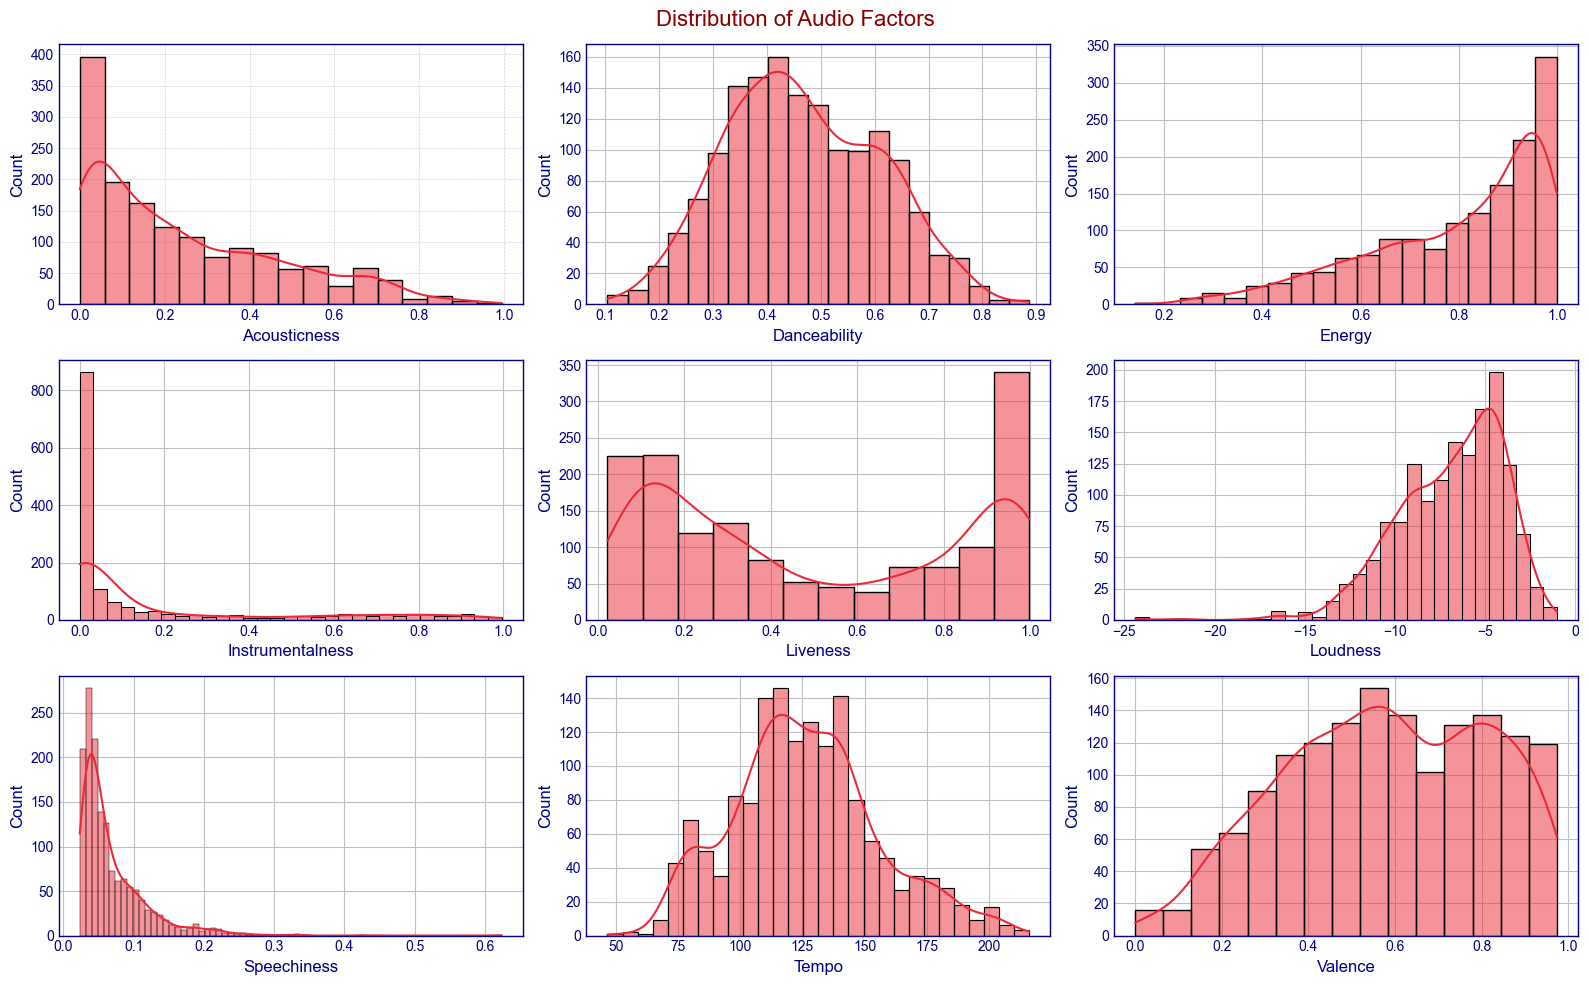


Correlation Matrix:


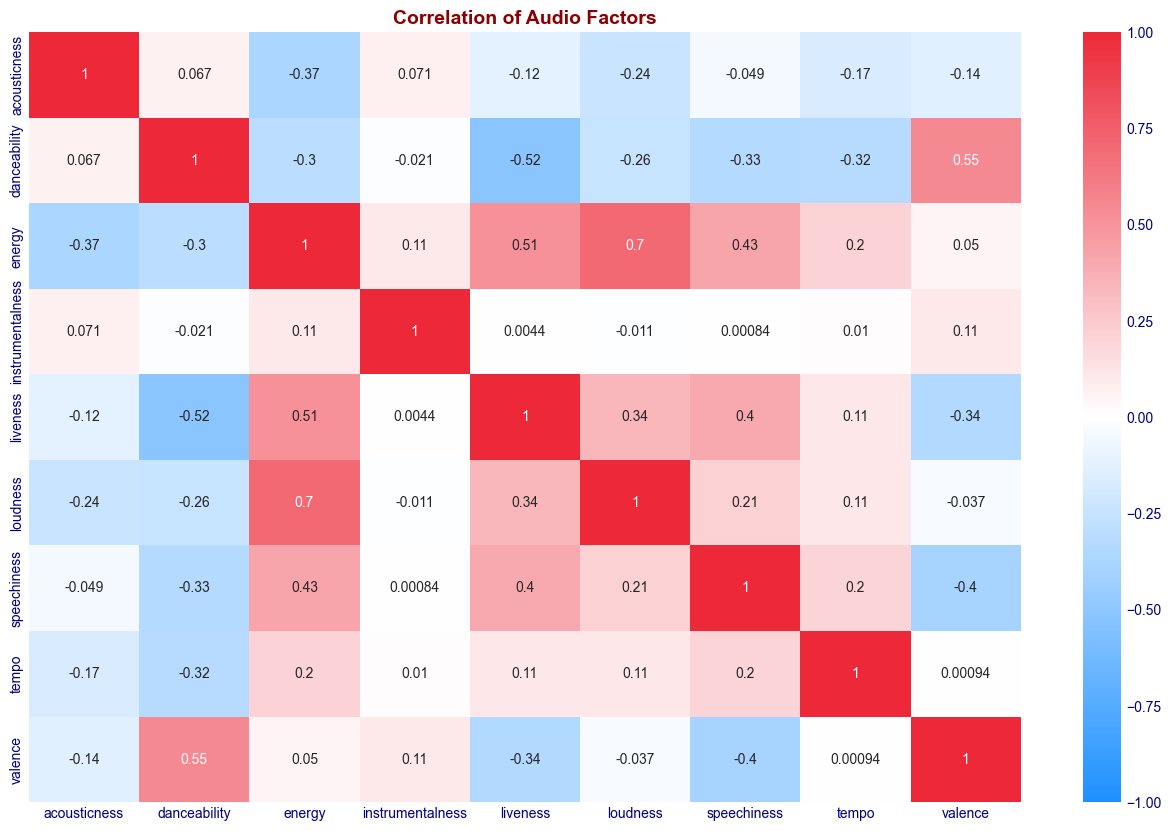


Unique Value Counts:
album: 90 unique values
name: 954 unique values


In [43]:
# Bring in Visual Formatting and Styling
%run "./00_Py_Spotify_Styling.ipynb"

def check_data_quality(df: pd.DataFrame) -> None:
    print("Results of Data Quality checks:")
    
    # Set the custom style
    set_stones_style()
    
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df[AUDIO_FEATURES].describe())

    # Value ranges
    print("\nValue Ranges Check:")
    for feature in AUDIO_FEATURES:
        if feature != 'loudness' and feature != 'tempo':
            if (df[feature] < 0).any() or (df[feature] > 1).any():
                print(f"Warning: {feature} has values outside the expected [0, 1] range")
                
    # Distribution visualizations
    print("\nDistribution Plots:")
    fig, axes = plt.subplots(3, 3, figsize=FIGURE_SIZES['large'])
    for i, feature in enumerate(AUDIO_FEATURES):
        sns.histplot(df_cleaned[feature], ax=axes[i//3, i%3], kde=True, color=STONES_PALETTE['red'])
        axes[i//3, i%3].set_xlabel(feature.capitalize())  # Capitalize x-axis label

    # Apply custom styling to the entire figure
    apply_stones_style(fig, fig.axes[0], 'Distribution of Audio Factors')

    # Set the main title for the entire figure
    fig.suptitle('Distribution of Audio Factors', fontsize=16, color=PLOT_STYLES['title_color'])

    # Remove the title from the first subplot
    axes[0, 0].set_title('')

    plt.tight_layout()
    plt.show()
    
    # Correlation check
    print("\nCorrelation Matrix:")
    correlation_matrix = df[AUDIO_FEATURES].corr()
    fig, ax = plt.subplots(figsize=FIGURE_SIZES['large'])
    # Use 'stones' colormap if styling is loaded, otherwise fallback to 'RdBu_r'
    try:
        sns.heatmap(correlation_matrix, annot=True, cmap='stones', vmin=-1, vmax=1, center=0, ax=ax)
    except ValueError:
        # Fallback to standard colormap if 'stones' is not available
        sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0, ax=ax)
    apply_stones_style(fig, ax, 'Correlation of Audio Factors')
    plt.show()
    
    # Unique value counts for categorical variables
    print("\nUnique Value Counts:")
    categorical_columns = ['album', 'name']
    for col in categorical_columns:
        print(f"{col}: {df[col].nunique()} unique values")

# Perform the data quality check
check_data_quality(df_cleaned)

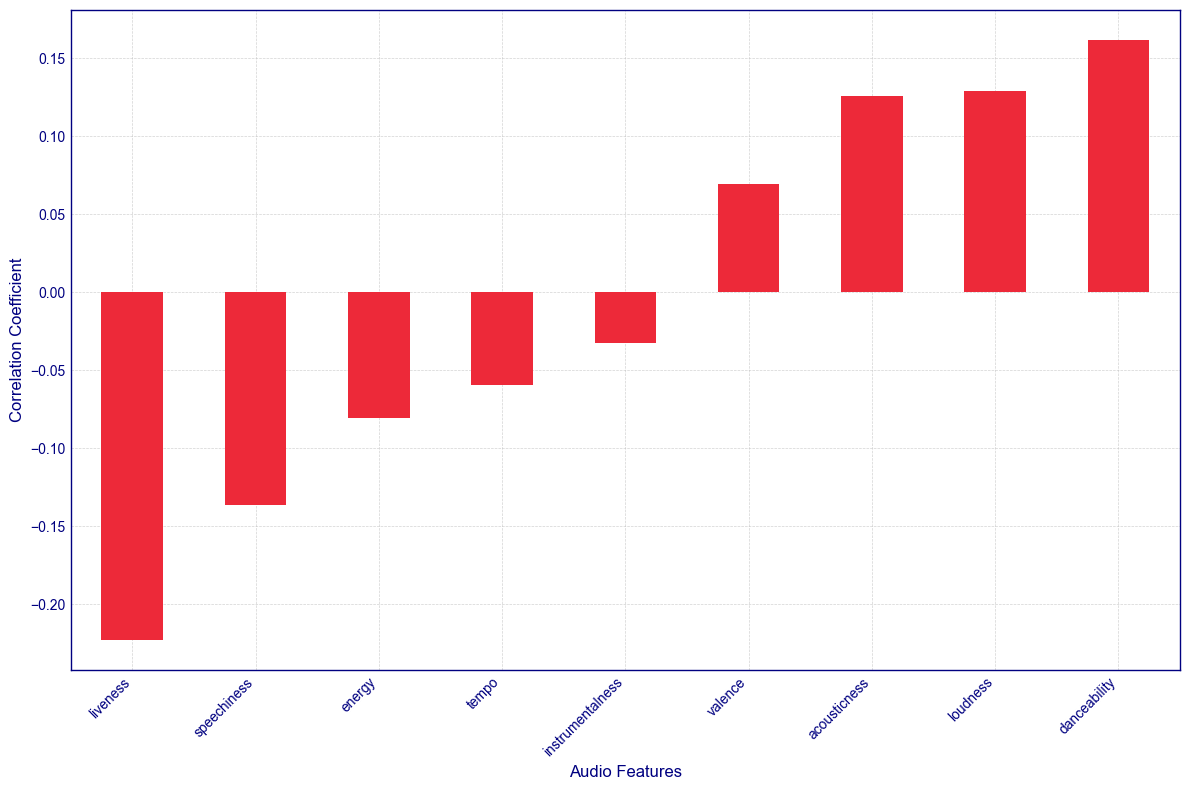

Correlations by popularity:
acousticness        0.125891
danceability        0.161753
energy             -0.080339
instrumentalness   -0.032478
liveness           -0.223062
loudness            0.128766
speechiness        -0.136353
tempo              -0.059103
valence             0.069230
Name: popularity, dtype: float64


<Figure size 1200x800 with 0 Axes>

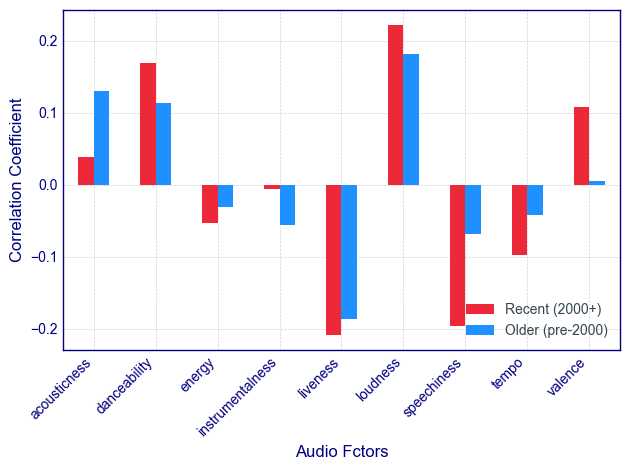

In [44]:
# Calculate correlations between popularity and audio features
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

# Visualize correlations
plt.figure(figsize=FIGURE_SIZES['medium'])
popularity_correlations.sort_values().plot(kind='bar', color=STONES_PALETTE['red'])
plt.title('Correlation of Audio Features with Popularity', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Features')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations by popularity:")
print(popularity_correlations)

# Create decade feature and perform time-based analysis
full_tracks['decade'] = pd.to_datetime(full_tracks['release_date']).dt.year // 10 * 10
recent_tracks = full_tracks[full_tracks['decade'] >= 2000]
older_tracks = full_tracks[full_tracks['decade'] < 2000]

recent_corr = recent_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')
older_corr = older_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

plt.figure(figsize=FIGURE_SIZES['medium'])
pd.DataFrame({'Recent (2000+)': recent_corr, 'Older (pre-2000)': older_corr}).plot(kind='bar')
plt.title('Popularity: Newer vs Older Tracks', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Fctors')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()